In [47]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


In [3]:
df = pd.read_csv('./allmovies_cleaned.csv')
#df

cols = df.date.str.split('-', expand=True)

#cols 

In [4]:
df.tail()

,Unnamed: 0,user,rating,date,movie
6385264,6386514,1559566,4,2005-09-09,1250
6385265,6386515,886903,3,2005-09-12,1250
6385266,6386516,502274,3,2005-10-21,1250
6385267,6386517,2549935,3,2005-10-24,1250
6385268,6386518,501797,5,2005-12-02,1250


In [5]:
quarter = {'01':1, '02':1, '03':1,
           '04':2, '05':2, '06':2, 
            '07':3, '08':3, '09':3,
          '10':4, '11':4, '12':4}


cols['quarter'] = cols.iloc[:,1].replace(quarter)

cols

,0,1,2,quarter
0,2005,09,06,3
1,2005,05,13,2
2,2005,10,19,4
3,2005,12,26,4
4,2004,05,03,2
...,...,...,...,...
6385264,2005,09,09,3
6385265,2005,09,12,3
6385266,2005,10,21,4
6385267,2005,10,24,4


In [6]:
df['year'] = cols.iloc[:,0]
df['quarter'] = cols['quarter']



In [7]:

df = df[['movie', 'year', 'quarter', 'rating']]
df.to_csv('./allmovies_cleaned_quarter.csv')

In [8]:
# Group by quarter 

grouped = df.groupby(['year','quarter', 'movie']).mean().reset_index() 

In [9]:
grouped.to_csv('./allmovies_cleaned_quarter_mean.csv')

In [10]:
grouped
grouped['year_quarter'] = grouped['year']+'_' + grouped['quarter'].astype(str)

pivot = grouped.pivot_table(columns='movie', 
                            index='year_quarter', values='rating')

total_nan_count = pivot.isna().sum().sum()
total_non_nan_count = pivot.count().sum()
print('Total NaN: {} \nTotal non-Nan: {}'.format(total_nan_count,total_non_nan_count))
print('Percentage NaN: {}'.format(total_nan_count/(total_non_nan_count+total_nan_count)))

#pivot = pivot.fillna(0)
# Review this line above

Total NaN: 15088 
Total non-Nan: 16162
Percentage NaN: 0.482816


In [11]:
pivot = pivot.sort_values('year_quarter', ascending=True)
pivot

movie,1,2,3,4,5,6,7,8,9,10,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
year_quarter,,,,,,,,,,,,,,,,,,,,,
1999_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.428571
2000_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.807692
2000_3,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.476190
2000_4,NaN,NaN,NaN,NaN,NaN,NaN,2.200000,NaN,NaN,NaN,...,3.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.567568
2001_1,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,...,3.500000,NaN,NaN,NaN,3.625000,NaN,NaN,NaN,NaN,3.530864
2001_2,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,NaN,NaN,NaN,...,3.166667,NaN,NaN,NaN,2.978723,NaN,NaN,NaN,NaN,3.405405
2001_3,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,2.826531,NaN,NaN,NaN,NaN,3.187500
2001_4,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,2.862903,NaN,NaN,NaN,NaN,3.327869


In [12]:
pivot = pivot.fillna(pivot.mean())


In [13]:
#sb.lineplot(data=pivot.iloc[:,0:10])
#plt.xticks(rotation=90)
pivot

movie,1,2,3,4,5,6,7,8,9,10,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
year_quarter,,,,,,,,,,,,,,,,,,,,,
1999_4,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,2.075758,3.486518,2.506579,3.148897,...,3.089482,3.260619,4.292549,2.543075,3.097628,2.763194,3.569444,3.192192,3.594308,3.422444
2000_1,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,2.075758,3.486518,2.506579,3.148897,...,3.089482,3.260619,4.292549,2.543075,3.097628,2.763194,3.569444,3.192192,3.594308,3.428571
2000_2,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,2.075758,3.486518,2.506579,3.148897,...,3.089482,3.260619,4.292549,2.543075,3.097628,2.763194,3.569444,3.192192,3.594308,2.807692
2000_3,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,1.000000,3.486518,2.506579,3.148897,...,2.000000,3.260619,4.292549,2.543075,3.097628,2.763194,3.569444,3.192192,3.594308,3.476190
2000_4,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,2.200000,3.486518,2.506579,3.148897,...,3.333333,3.260619,4.292549,2.543075,3.097628,2.763194,3.569444,3.192192,3.594308,3.567568
2001_1,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,3.000000,3.486518,2.506579,3.148897,...,3.500000,3.260619,4.292549,2.543075,3.625000,2.763194,3.569444,3.192192,3.594308,3.530864
2001_2,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,1.333333,3.486518,2.506579,3.148897,...,3.166667,3.260619,4.292549,2.543075,2.978723,2.763194,3.569444,3.192192,3.594308,3.405405
2001_3,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,1.000000,3.486518,2.506579,3.148897,...,3.000000,3.260619,4.292549,2.543075,2.826531,2.763194,3.569444,3.192192,3.594308,3.187500
2001_4,3.700801,3.567292,3.636665,2.626273,3.953968,3.031894,2.000000,3.486518,2.506579,3.148897,...,2.000000,3.260619,4.292549,2.543075,2.862903,2.763194,3.569444,3.192192,3.594308,3.327869


In [14]:
X = pivot.iloc[:,0:].reset_index()
print(X.shape)
X = X.iloc[:,1:]
print(type(X))

(25, 1251)
<class 'pandas.core.frame.DataFrame'>


In [15]:
X = X.values

In [16]:
X

array([[3.70080092, 3.56729225, 3.6366653 , ..., 3.19219153, 3.59430809,
        3.42244437],
       [3.70080092, 3.56729225, 3.6366653 , ..., 3.19219153, 3.59430809,
        3.42857143],
       [3.70080092, 3.56729225, 3.6366653 , ..., 3.19219153, 3.59430809,
        2.80769231],
       ...,
       [3.91208791, 3.71052632, 3.68666667, ..., 3.31428571, 3.56132075,
        3.4827044 ],
       [3.71304348, 3.17142857, 3.58666667, ..., 3.14285714, 3.76102941,
        3.51515152],
       [3.90140845, 3.78947368, 3.61666667, ..., 3.25      , 3.70967742,
        3.50682261]])

In [17]:
#X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

In [18]:
quarters = list(pivot.index.values)
print(labels)
# the labels are the index of the cluster that the row gets assigned to
#print(array)
#quarters

[2 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 2 2 2 2 1 1 1 1 1]


In [19]:
print(len(X[:,0]))
len(clusters[:,0])

25


3

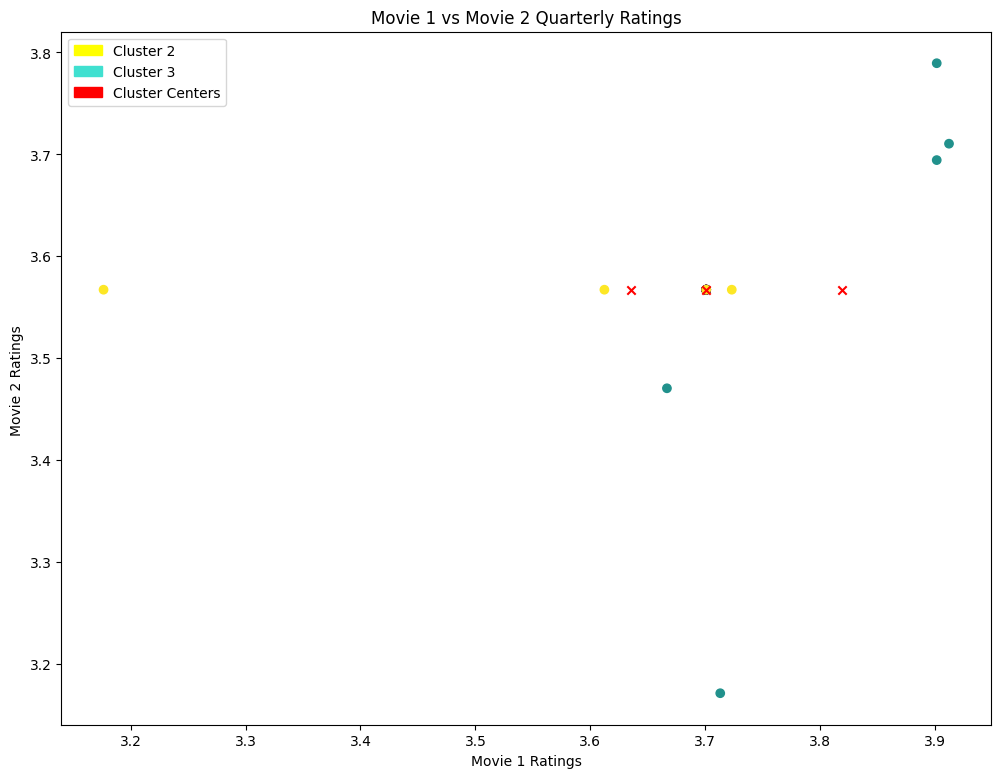

In [20]:
plt.figure(figsize=(12, 9))

plt.scatter(X[:,0],X[:,1], c=labels)
plt.xlabel('Movie 1 Ratings')
plt.ylabel('Movie 2 Ratings ')
plt.title('Movie 1 vs Movie 2 Quarterly Ratings')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red')


blue_patch = mpatches.Patch(color='Yellow', label='Cluster 2')
green_patch = mpatches.Patch(color='Turquoise', label='Cluster 3')
red_patch = mpatches.Patch(color='Red', label='Cluster Centers')

plt.legend(handles=[blue_patch, green_patch, red_patch])

plt.show()

In [34]:
movieIDArray = list(range(1,len(X[0,:])+1))
len(movieIDArray)

1250

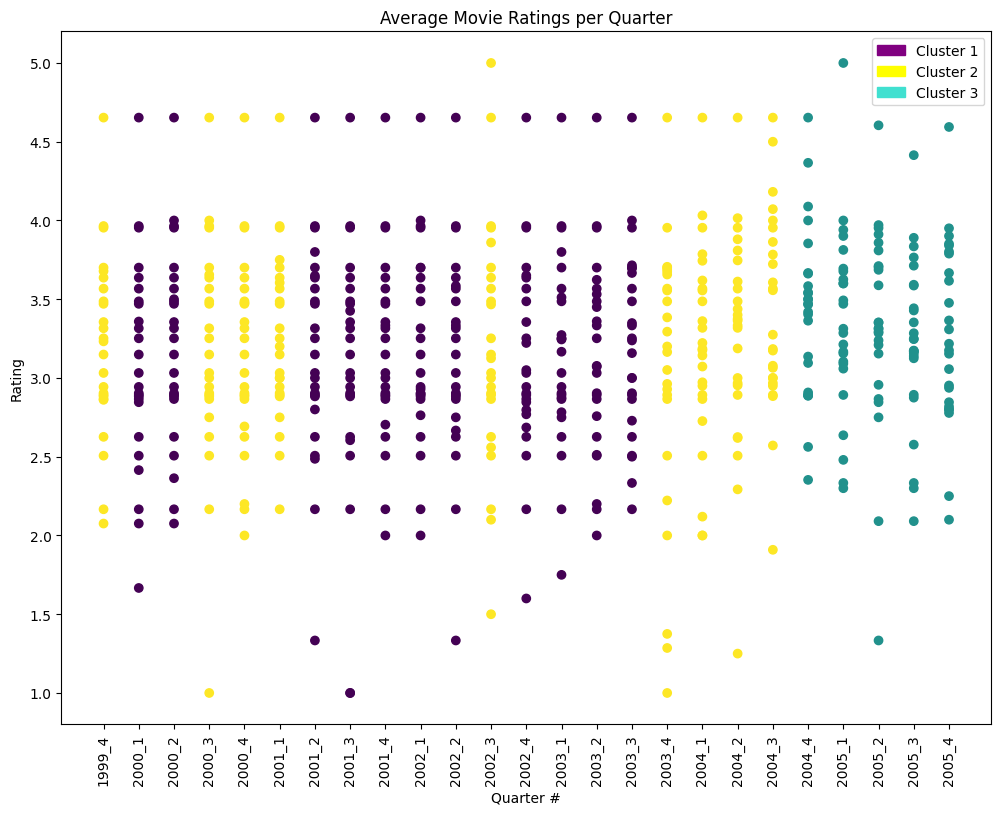

In [37]:
plt.figure(figsize=(12, 9))

for i in range(0,len(X[:,0])): #index over all columns
    plt.scatter(quarters, X[:,i], c=labels) #plot all quarters, all column values, colored with row labels


plt.xlabel('Quarter #')
plt.ylabel('Rating')


red_patch = mpatches.Patch(color='Purple', label='Cluster 1')
blue_patch = mpatches.Patch(color='Yellow', label='Cluster 2')
green_patch = mpatches.Patch(color='Turquoise', label='Cluster 3')

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.title("Average Movie Ratings per Quarter")
#plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red', s=75, label='Cluster')
plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.show()

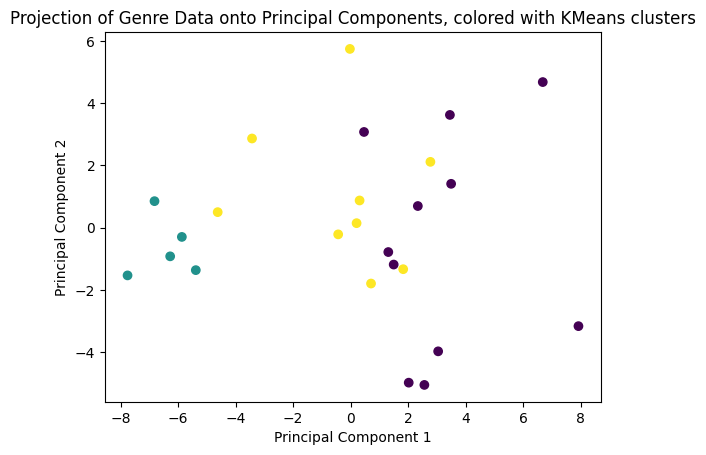

In [41]:

# Apply PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X)

loadings = pca.components_

#pca_data now has projected data in reduced dimensions
#  Each row in pca_data corresponds to a data point in X, where the columns represent the different principal components in descending order of explained variance.
# colored with kmeans labels 

plt.scatter(pca_data[:,0], pca_data[:,1], c=labels) #all rows, first column, colored with kmeans clusters
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Genre Data onto Principal Components, colored with KMeans clusters')
plt.show()

In [45]:
loadings = pca.components_
# Analyze the loadings
for i, pc in enumerate(range(1, 3+1)):  # Assuming optimizedClusters principal components
    print(f"Principal Component {pc}:")
    for j, feature in enumerate(range(X.shape[0])):  # Assuming X has shape (n_samples, n_features)
        loading = loadings[i, j]
        print(f"- {quarters[j]}: {loading:.4f}")
    print()

Principal Component 1:
- 1999_4: -0.0082
- 2000_1: -0.0001
- 2000_2: -0.0015
- 2000_3: -0.0099
- 2000_4: 0.0014
- 2001_1: -0.0131
- 2001_2: -0.0808
- 2001_3: 0.0042
- 2001_4: -0.0011
- 2002_1: -0.0053
- 2002_2: -0.0084
- 2002_3: -0.0558
- 2002_4: 0.0013
- 2003_1: -0.0197
- 2003_2: 0.0196
- 2003_3: -0.0530
- 2003_4: -0.0002
- 2004_1: -0.0215
- 2004_2: -0.0022
- 2004_3: -0.0379
- 2004_4: -0.0232
- 2005_1: -0.0137
- 2005_2: -0.0358
- 2005_3: -0.0305
- 2005_4: -0.0014

Principal Component 2:
- 1999_4: -0.0047
- 2000_1: -0.0052
- 2000_2: 0.0004
- 2000_3: -0.0443
- 2000_4: -0.0019
- 2001_1: -0.0160
- 2001_2: 0.0214
- 2001_3: 0.0051
- 2001_4: 0.0006
- 2002_1: 0.0052
- 2002_2: -0.0029
- 2002_3: -0.0226
- 2002_4: -0.0029
- 2003_1: -0.0277
- 2003_2: 0.0179
- 2003_3: 0.0246
- 2003_4: -0.0002
- 2004_1: 0.0204
- 2004_2: 0.0073
- 2004_3: 0.0366
- 2004_4: -0.0537
- 2005_1: -0.0338
- 2005_2: -0.0018
- 2005_3: -0.0107
- 2005_4: -0.0066

Principal Component 3:
- 1999_4: 0.0130
- 2000_1: 0.0000
- 2000_2:

In [62]:
len(loadings[0])
len(loadings.T)

1250

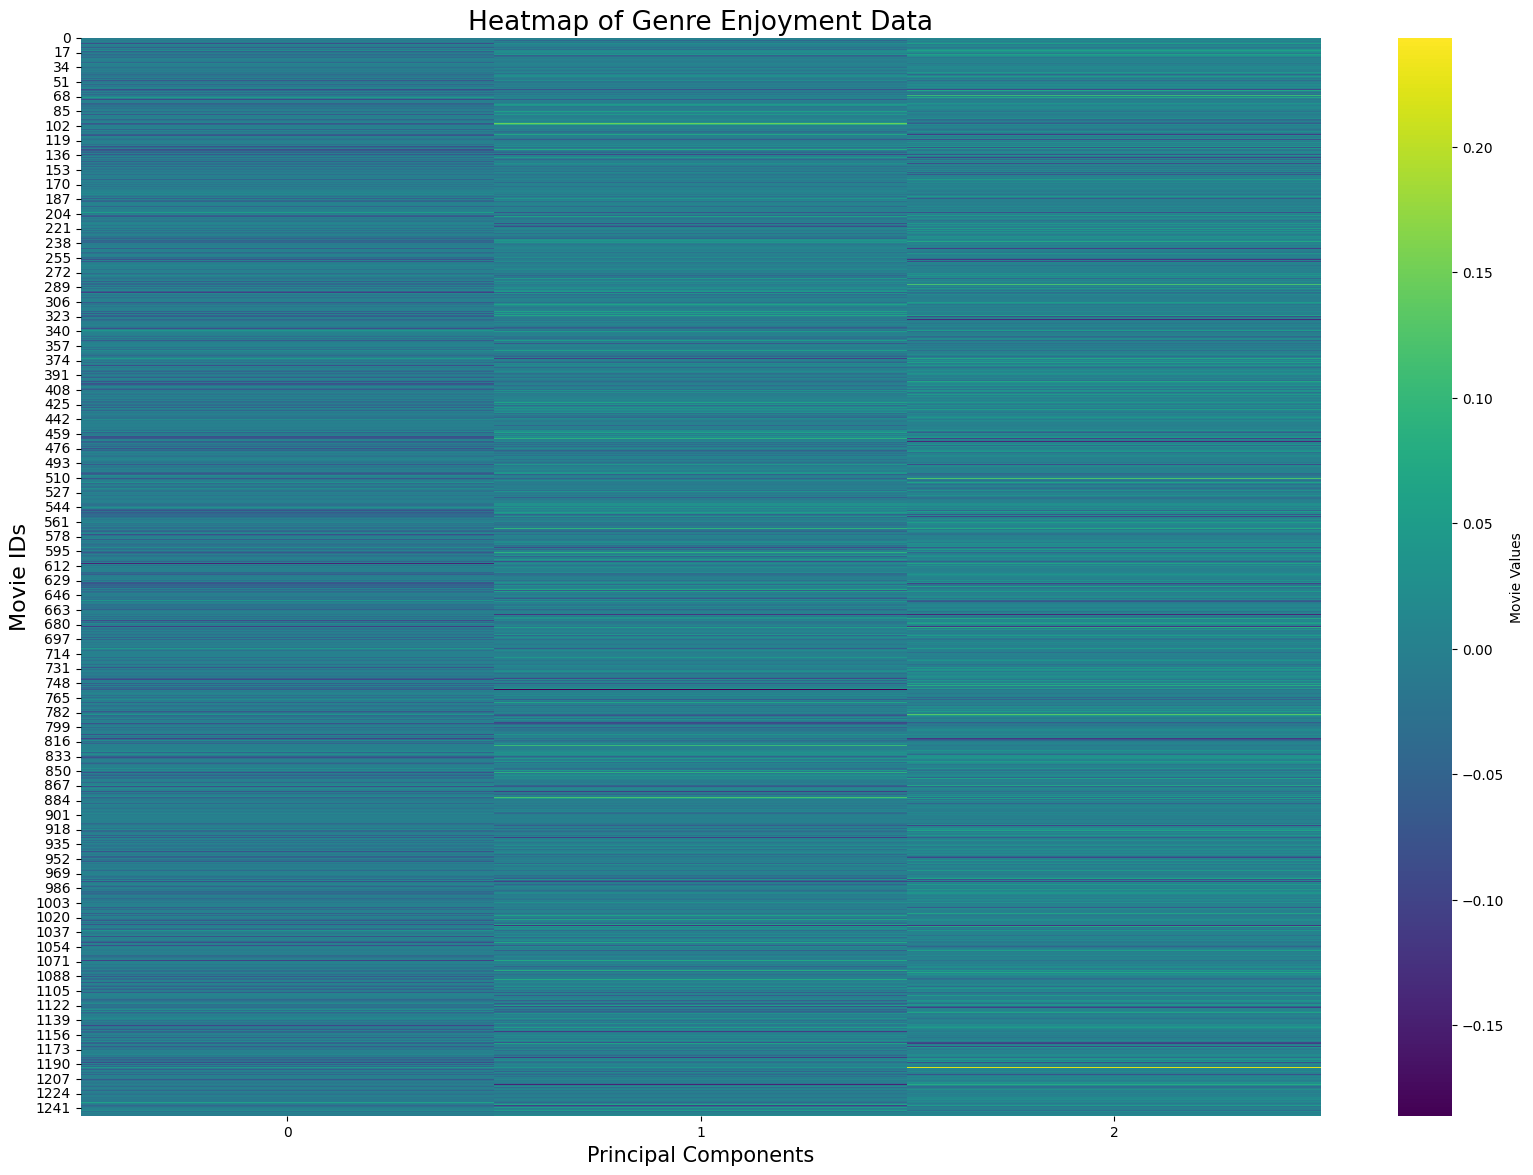

In [60]:
# Make heatmap of this heere
plt.figure(figsize=(20, 14))
heatmap = sns.heatmap(loadings.T, cmap="viridis", cbar_kws={'label': 'Movie Values'})
#heatmap.set_yticklabels(quarters, rotation=0)

plt.ylabel("Movie IDs", fontsize=16)
plt.xlabel("Principal Components", fontsize=15)
plt.title("Heatmap of Genre Enjoyment Data", fontsize=19)
#plt.xticks(rotation=90)
plt.show()

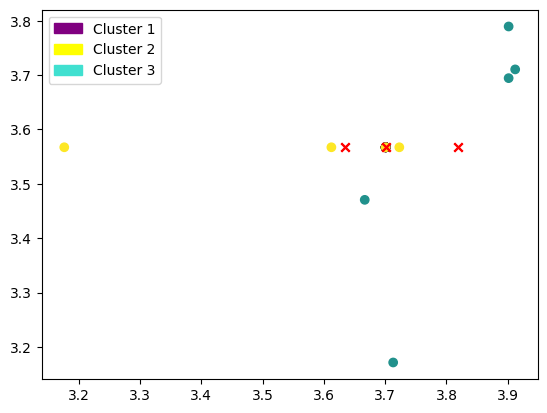

In [61]:

# Create a plot
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red')

# Add the custom legend
plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red')

# Display the plot
#plt.legend()


[[3.70080092 3.56729225 3.62117277 ... 3.14418922 3.59430809 3.35068066]
 [3.81892299 3.56729225 3.6356204  ... 3.26404398 3.63816971 3.50609605]
 [3.63517755 3.56729225 3.65618111 ... 3.21094299 3.56994052 3.46368242]]
1250


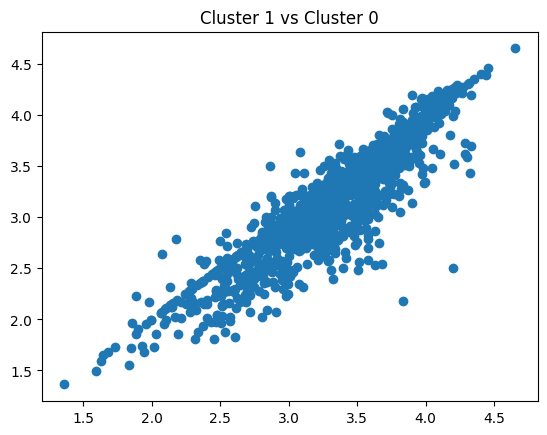

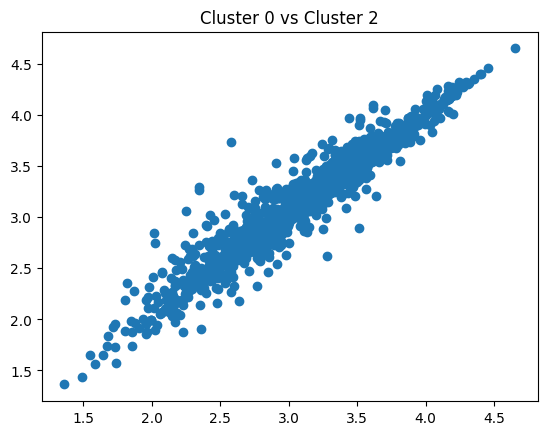

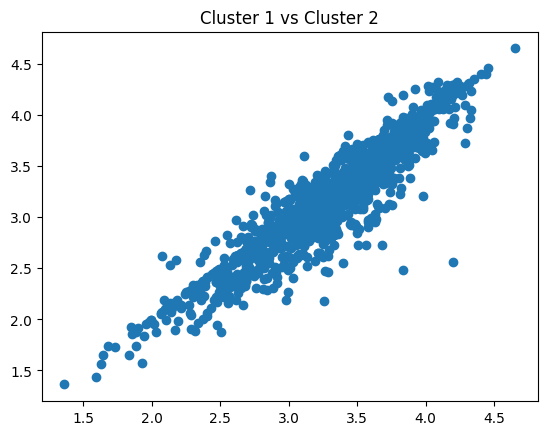

In [23]:
print(clusters)
print(len(clusters[0]))
#1250 data points have been assigned to cluster[0]

plt.scatter(clusters[1],clusters[0])
plt.title("Cluster 1 vs Cluster 0")
plt.figure()

plt.scatter(clusters[0],clusters[2])
plt.title("Cluster 0 vs Cluster 2")

plt.figure()
plt.scatter(clusters[1],clusters[2])
plt.title("Cluster 1 vs Cluster 2")

plt.show()

Text(0.5, 0, 'Cluster 2')

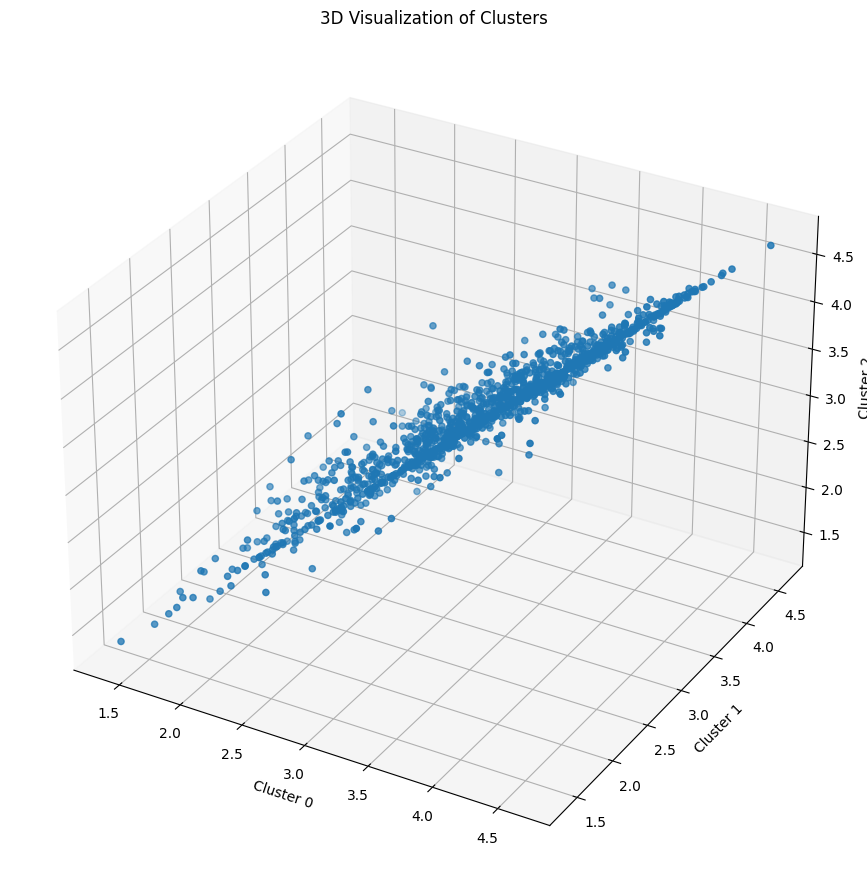

In [24]:
fig = plt.figure(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters[0],clusters[1], clusters[2])#, c=labels)

plt.title("3D Visualization of Clusters")
ax.set_xlabel('Cluster 0')
ax.set_ylabel('Cluster 1')
ax.set_zlabel('Cluster 2')
# clusters[0] is of size 1250, num movies examined
# x represents 


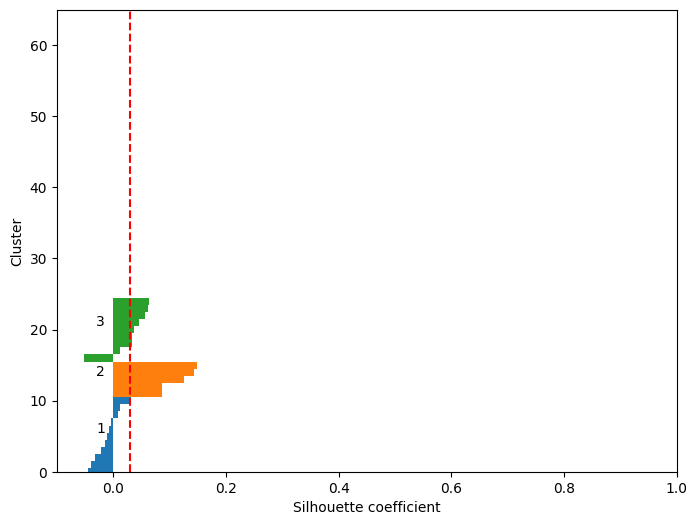

In [25]:
from sklearn.metrics import silhouette_samples

# Calculate silhouette coefficients
silhouette_vals = silhouette_samples(X, labels)

# Create a vertical bar plot for each data point
fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(labels)):
    cluster_vals = silhouette_vals[labels == cluster]
    cluster_vals.sort()
    
    y_upper += len(cluster_vals)
    ax.barh(range(y_lower, y_upper), cluster_vals, height=1.0, edgecolor='none')
    ax.text(-0.03, (y_lower + y_upper) / 2, str(i+1))
    
    y_lower += len(cluster_vals)

# Calculate the average silhouette score
avg_score = np.mean(silhouette_vals)

# Set the limits and labels of the plot
ax.axvline(avg_score, color='red', linestyle='--')
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (len(np.unique(labels)) + 1) * 10])
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Cluster')

# Show the plot
plt.show()